In [1]:
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import cv2
import os
from PIL import Image
import matplotlib.pyplot as plt
from my_pca import MyPCA

In [2]:
def load_image(image_dir = '000' , n = 100):
    X = []
    target_size = (256, 256)
    i = 0
    for img in os.listdir(image_dir):
        img_path = os.path.join(image_dir, img)
        image = cv2.imread(img_path) # (1024, 1024, 3)
        resized_image = crop_image(image)#(630,500,3)
        # resized_image = cv2.resize(cropped_image, target_size)
        color_image = cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB)
        X.append(color_image)
        i +=1
        if i >= n:
            break
    return np.array(X)

In [3]:
def crop_image(image):
    x1, y1 = 250, 150 # Top-left
    x2, y2 = 750, 780 # Bottom-righ
    cropped_image = image[y1:y2, x1:x2,:]
    return cropped_image

In [4]:
def mask_blocks(X,mask_size = (10,10),n = 100):
    mask_size_high = mask_size[0]
    mask_size_width = mask_size[1]
    pos_list = []
    for i in range(0, X.shape[0]-mask_size_high, mask_size_high):
        for j in range(0, X.shape[1]-mask_size_width, mask_size_width):
            pos = (i,j)
            pos_list.append(pos)
    mask_block_indexs = np.random.choice(len(pos_list), size=n, replace=False)
    mask = np.ones_like(X)
    for index in mask_block_indexs:
        i, j = pos_list[index]
        mask[:,i:i+mask_size_high ,j:j+mask_size_width,: ] = 0
    return mask

In [5]:
def show_face(data,title):
    num_images_to_show = 5
    if data.ndim != 4:
        data_reshaped = data.reshape(-1, 256, 256, 3)
    else:
        data_reshaped = data
    plt.figure(figsize=(20, 5))
    plt.title(title)
    for i in range(num_images_to_show):
        resized_image = data_reshaped[i].astype(np.uint8)
        plt.subplot(1, num_images_to_show, i + 1)
        plt.imshow(resized_image)
        plt.axis('off')


In [6]:
X = load_image(n = 1000)

#X_pca = pca.transform(X)

In [7]:
shape = X.shape
#n_components = int(shape[1] * shape[2] * shape[3] * 0.2)
pca = MyPCA(n_components=None)
X_reshaped = X.view().reshape(X.shape[0], -1)
pca.fit(X_reshaped)

: 

In [ ]:
other_X = load_image('001')

In [ ]:
#mask.sum(axis = 3).sum(axis = 2).sum(axis = 1)

In [ ]:
mask = mask_blocks(other_X,mask_size = (10,10),n = 100)
other_X_mask_with_nan = np.where(mask, other_X, np.nan)
other_X_mask_with_0 = np.where(mask, other_X, 0)

In [ ]:
#other_X_mask_with_nan

In [ ]:
other_X_mask_with_nan_reshaped =  other_X_mask_with_nan.view().reshape(other_X_mask_with_nan.shape[0], -1)
other_X_mask_with_nan_reshaped.shape

(100, 196608)

In [ ]:
transformed_data = pca.transform(other_X_mask_with_nan_reshaped)
reconstructed_data = pca.inverse_transform(transformed_data)
reconstructed_data.shape

(100, 196608)

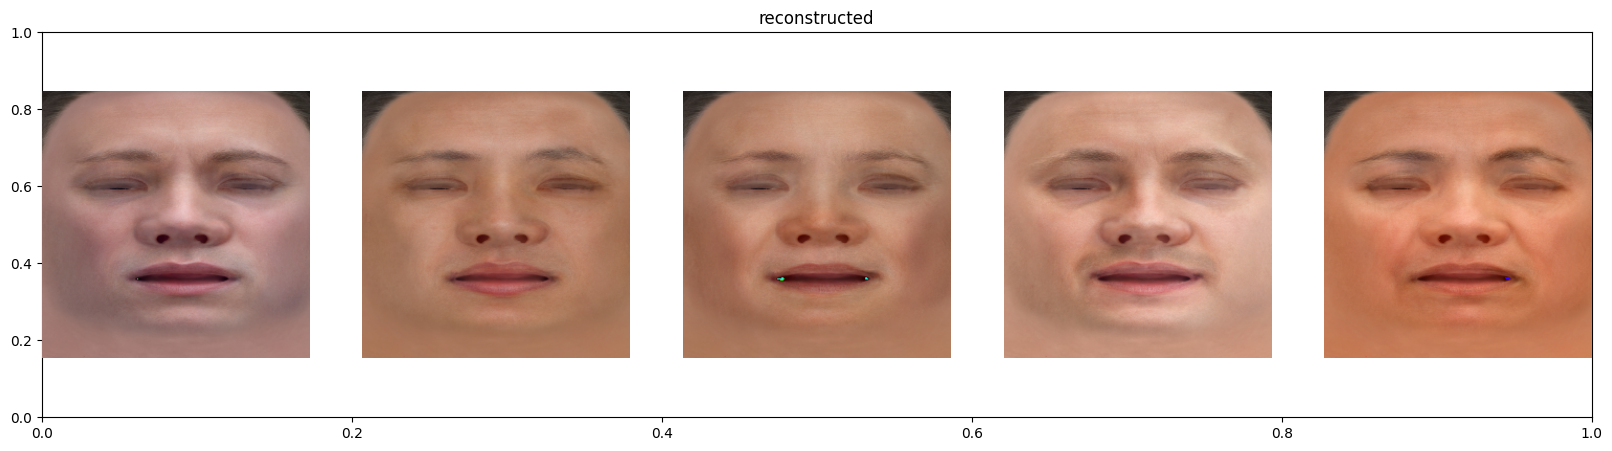

In [ ]:
show_face(reconstructed_data,'reconstructed')

In [ ]:
mask.shape

(100, 256, 256, 3)

In [ ]:
other_X.shape

(100, 256, 256, 3)

In [ ]:
reconstructed_data.shape

(100, 196608)

In [ ]:
#reconstructed_data_with_original = np.where(mask, other_X, reconstructed_data.reshape(-1, 256, 256, 3) )

reconstructed_data_with_original = other_X * mask + reconstructed_data.reshape(-1, 256, 256, 3) * (1 - mask)

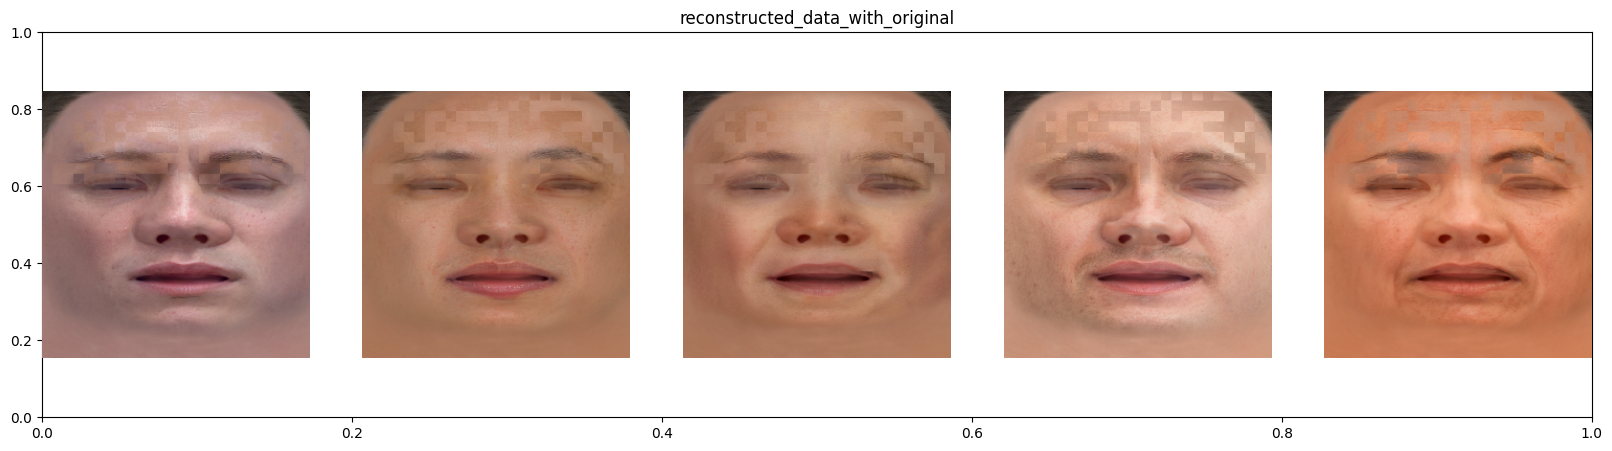

In [ ]:
show_face(reconstructed_data_with_original,'reconstructed_data_with_original')

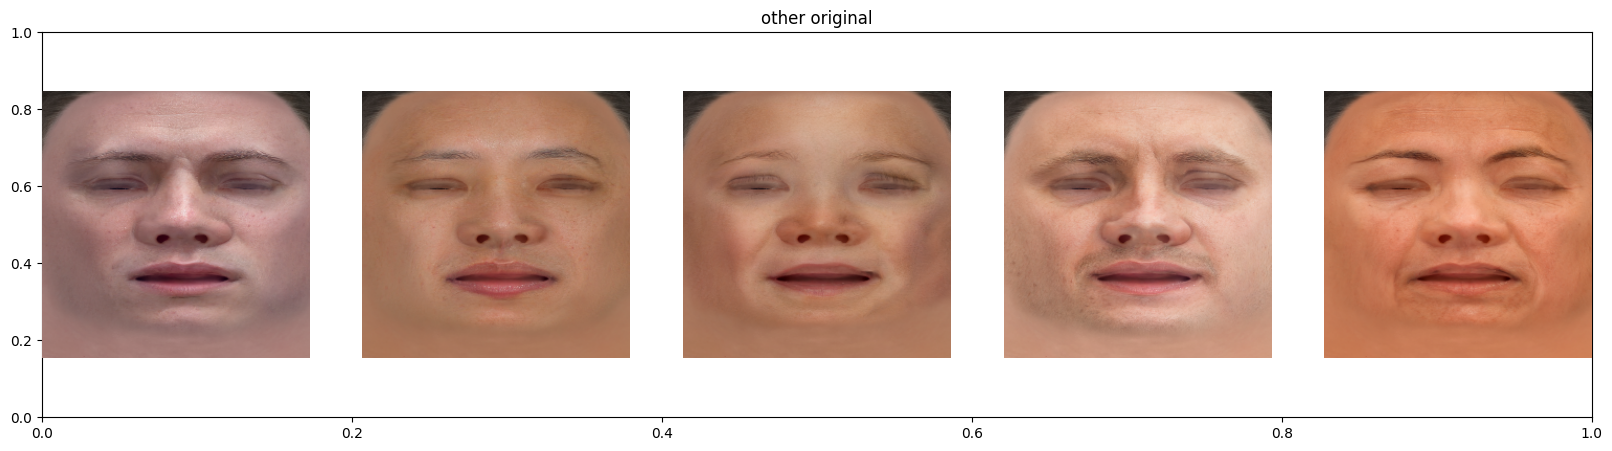

In [ ]:
show_face(other_X,"other original")

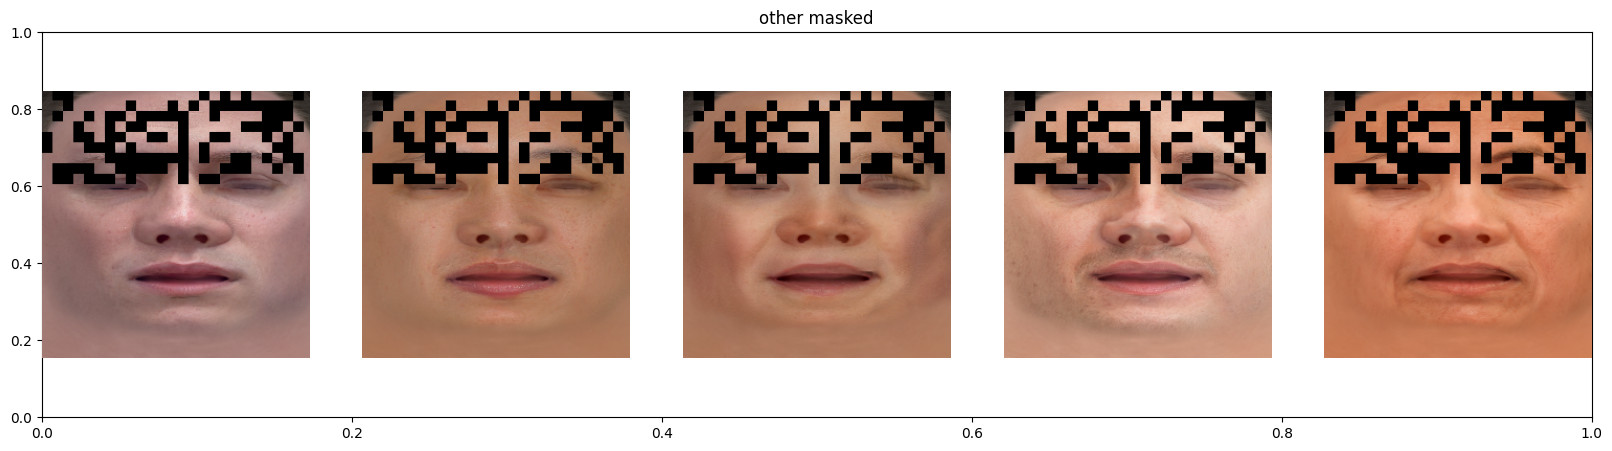

In [ ]:
show_face(other_X_mask_with_0 ,'other masked')

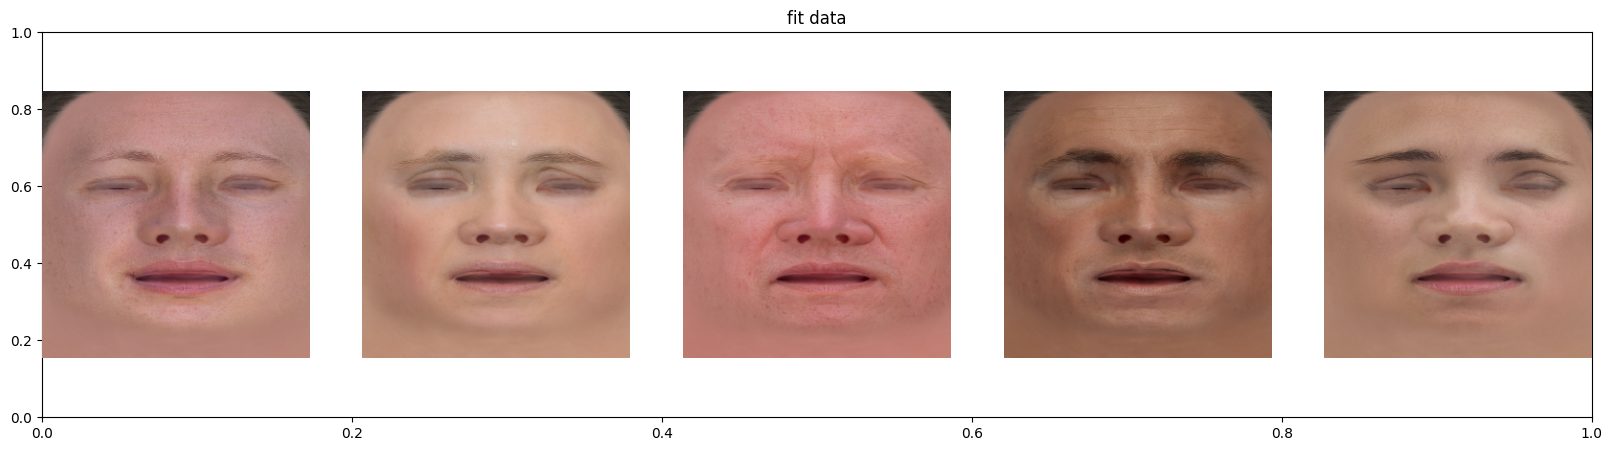

In [ ]:
show_face(X ,'fit data')